Hello, my name is Artem. I'm going to review your project!

You can find my comments in <font color='green'>green</font>, <font color='blue'>blue</font> or <font color='red'>red</font> boxes like this:

<div class="alert alert-block alert-success">
<b>Success:</b> if everything is done succesfully
</div>

<div class="alert alert-block alert-info">
<b>Improve: </b> "Improve" comments mean that there are tiny corrections that could help you to make your project better.
</div>

<div class="alert alert-block alert-danger">
<b>Needs fixing:</b> if the block requires some corrections. Work can't be accepted with the red comments.
</div>

### <font color='orange'>General feedback</font>
### <font color='orange'>General feedback</font>
* Thank you for sending your project. You've done a really good job on it! It was interesting to check. 
* The code style is very good. I was really surprised!
* Glad to see that notebook is well-structured.
* Great that plots were named.
* I've left some comments which could help you to improve your project and further develop your skills.
* You've mastered the hypothesis testing technique. Congratulations!
* Your project has been accepted and now you can move on to the next sprint.
* Keep up the good work, and good luck on the next sprint!

# Finding The Most Profitable Pre-Paid Plan 
Megaline offers its customers two plans, the Surf and Ultimate plans. In order to set our advertising budget, we need to determine which of the two plans is more profitable. To conduct our analysis, we've assembled a sample of 500 client accounts. We'll explore who these customers are, the plan they use, and the volume of calls and messages they sent on our network in 2018. We'll then perform some analysis to determine which prepaid plan is the most profitable so that we can adjust our customer acquisition budget accordingly. 

## Step 1: Analyze The Data 
To get started, let's begin by importing our data and taking a look at some vital stats. 

<div class="alert alert-block alert-info">
<b>Improve: </b> Please, collect all imports in the first cell of the notebook next time.
</div>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import re
from scipy import stats as st
%matplotlib inline 

df_inter = pd.read_csv('/datasets/megaline_internet.csv')
df_users = pd.read_csv('/datasets/megaline_users.csv')
df_calls = pd.read_csv('/datasets/megaline_calls.csv')
df_messages = pd.read_csv('/datasets/megaline_messages.csv')
df_plans = pd.read_csv('/datasets/megaline_plans.csv')



### We've Imported Our Data 
Well, the good news is we got our data imported. The bad news is, it's in a bunch of different dataframes! We'll want to combine these dataframes into one dataframe to perform our analysis later on, but for now, we need a solution to help speed up our analysis. One good approach is to use functions to quickly analyze our data. Let's define a few now.  

In [19]:

#Let's take a moment to collect some basic information about each of these datasets. 
def get_info(df):
    print('Head:')
    print()
    display(df.head())
    print ('-'*117)
    print('Info:')
    print()
    display(df.info())
    print ('-'*117)
    print('Describe:')
    print()
    display(df.describe())
    print ('-'*117)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    get_percent_of_na(df,2)
    print ('-'*117)
    print('Shape:')
    print(df.shape)
    print ('-'*117)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    
# we can also use a function to help us to identify any missing values in our dataframes. 
def get_percent_of_na(df,num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index,s.values):
        
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent,num,num_of_nulls))
        
    if count !=0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")

### Functions Defined! 

Great, that'll help to speed up our analysis a lot! Let's put our functions to the test and see what we find! 

In [20]:
get_info(df_calls)
get_info(df_inter)
get_info(df_messages)
get_info(df_plans)
get_info(df_users)

Head:



,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


---------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


None

---------------------------------------------------------------------------------------------------------------------
Describe:



,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


---------------------------------------------------------------------------------------------------------------------


,id,call_date
count,137735,137735
unique,137735,351
top,1193_196,2018-12-27
freq,1,1091



Columns with nulls:

There are no columns with NA.
---------------------------------------------------------------------------------------------------------------------
Shape:
(137735, 4)
---------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.

Head:



,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


---------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


None

---------------------------------------------------------------------------------------------------------------------
Describe:



,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


---------------------------------------------------------------------------------------------------------------------


,id,session_date
count,104825,104825
unique,104825,351
top,1193_196,2018-12-24
freq,1,851



Columns with nulls:

There are no columns with NA.
---------------------------------------------------------------------------------------------------------------------
Shape:
(104825, 4)
---------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.

Head:



,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


---------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


None

---------------------------------------------------------------------------------------------------------------------
Describe:



,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


---------------------------------------------------------------------------------------------------------------------


,id,message_date
count,76051,76051
unique,76051,351
top,1328_5,2018-12-28
freq,1,702



Columns with nulls:

There are no columns with NA.
---------------------------------------------------------------------------------------------------------------------
Shape:
(76051, 3)
---------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.

Head:



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


---------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


None

---------------------------------------------------------------------------------------------------------------------
Describe:



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


---------------------------------------------------------------------------------------------------------------------


,plan_name
count,2
unique,2
top,surf
freq,1



Columns with nulls:

There are no columns with NA.
---------------------------------------------------------------------------------------------------------------------
Shape:
(2, 8)
---------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.

Head:



,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


---------------------------------------------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

---------------------------------------------------------------------------------------------------------------------
Describe:



,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


---------------------------------------------------------------------------------------------------------------------


,first_name,last_name,city,reg_date,plan,churn_date
count,500,500,500,500,500,34
unique,458,399,73,266,2,29
top,Jasper,Mclean,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-06,surf,2018-12-18
freq,3,3,80,5,339,3



Columns with nulls:
Column churn_date has 93.20% percent of Nulls, and 466 of nulls
There are 1 columns with NA.
---------------------------------------------------------------------------------------------------------------------
Shape:
(500, 8)
---------------------------------------------------------------------------------------------------------------------
Duplicated:
We have 0 duplicated rows.



<div class="alert alert-block alert-success">
<b>Success:</b> The first step was done well!
</div>

### There's Only 1 NA Value 

Our analysis revealed that our data sample is very healthy: there's only one place where we might be missing a churn date. We know that that might be an issue for anyone who still had an active plan at the time the data was pulled, so we can continue with out analysis. 

## Step 2. Process the Data 
Now that we've identified the issues in our dataset, let's continue our analysis by making some changes to our data. We'll make adjustments to datatypes, look for errors in our data, and perform some calculations for the users in our sample. 

In [21]:
#first, we need to standardize our user ID's so that we can compare them across dataframes. 
get_id = np.vectorize(lambda x: re.sub('.*_','',x))

#We'll want to better organize our date/time data and and split our data day/month/year columns
def get_info_date(df):
    columns = df.columns.tolist()
    idx = [columns.index(x) for x in columns  if 'date' in x][0]
    
    df[columns[idx]] = pd.to_datetime(df[columns[idx]])
    df['day'] = df[columns[idx]].dt.day_name()
    df['month'] = df[columns[idx]].dt.month_name()
    df['year'] = df[columns[idx]].dt.year
    return df

### Now, Let's Update Our Data! 

Now that we've written a function to help define our data further, let's work through our dataframes to get them updated. 

In [22]:
df_inter = get_info_date(df_inter)
df_inter['id'] = get_id(df_inter['id'])
df_inter.head()

,id,user_id,session_date,mb_used,day,month,year
0,13,1000,2018-12-29,89.86,Saturday,December,2018
1,204,1000,2018-12-31,0.00,Monday,December,2018
2,379,1000,2018-12-28,660.40,Friday,December,2018
3,413,1000,2018-12-26,270.99,Wednesday,December,2018
4,442,1000,2018-12-27,880.22,Thursday,December,2018


In [23]:
df_messages['id'] = get_id(df_messages['id'])
df_messages = get_info_date(df_messages)
df_messages.head()

,id,user_id,message_date,day,month,year
0,125,1000,2018-12-27,Thursday,December,2018
1,160,1000,2018-12-31,Monday,December,2018
2,223,1000,2018-12-31,Monday,December,2018
3,251,1000,2018-12-27,Thursday,December,2018
4,255,1000,2018-12-26,Wednesday,December,2018


In [24]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['id'] = get_id(df_calls['id'])
df_calls = get_info_date(df_calls)
df_calls['call_type'] = np.where(df_calls['duration'] == 0,'Missed call','Connected call')
df_calls.head()

,id,user_id,call_date,duration,day,month,year,call_type
0,93,1000,2018-12-27,8.52,Thursday,December,2018,Connected call
1,145,1000,2018-12-27,13.66,Thursday,December,2018,Connected call
2,247,1000,2018-12-27,14.48,Thursday,December,2018,Connected call
3,309,1000,2018-12-28,5.76,Friday,December,2018,Connected call
4,380,1000,2018-12-30,4.22,Sunday,December,2018,Connected call


In [25]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.rename(columns = {'tariff':'plan'}, inplace = True)
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


In [26]:
#Calls per user per month
calls_made = df_calls.groupby(['user_id','month']).agg({'id':'count'}).rename(columns={'id':'Calls Made'})

#Minutes per user per month
min_spent = df_calls.groupby(['user_id','month']).agg({'duration':'sum'}).rename(columns={'duration':'Minutes Spent'})

#Traffic per user per month
mb_used = df_inter.groupby(['user_id','month']).agg({'mb_used':'sum'}).rename(columns={'mb_used':'Mb Used'})

#Messages per user per month
messages_sent = df_messages.groupby(['user_id','month']).agg({'id':'count'}).rename(columns={'id':'Messages Sent'})

#Plan for each user
plan = df_users[['user_id','plan']]

#Combined into one table
df_usage = pd.concat([calls_made, min_spent, mb_used, messages_sent],axis=1).reset_index().merge(plan,on='user_id')
df_usage.head(20)

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan
0,1000,December,16.0,116.83,1901.47,11.0,ultimate
1,1001,August,27.0,171.14,6919.15,30.0,surf
2,1001,December,56.0,392.93,19369.18,44.0,surf
3,1001,November,64.0,404.59,18504.30,36.0,surf
4,1001,October,65.0,374.11,22330.49,53.0,surf
5,1001,September,49.0,297.69,13314.82,44.0,surf
6,1002,December,47.0,363.24,14396.24,41.0,surf
7,1002,November,55.0,359.76,19345.08,32.0,surf
8,1002,October,11.0,54.13,6552.01,15.0,surf
9,1003,December,149.0,1041.00,27044.14,50.0,surf


<div class="alert alert-block alert-success">
<b>Success:</b> Well done!
</div>

### Times Are Updated! 

Now that we've updated our times to reflect proper date-time notation we'll have a much easier time analyzing our data. Now let's move on to exploring our missing values and our overages. 

In [30]:
# function for iterating fillna across datadrames
def fill_na(df):
    if df.isna().sum().sum() !=0:
        df.fillna(0,inplace=True)
    return df

# We can use a classification function to determine if users are over their plan threshold. 
def calculate_overage(df,df_plan):
    df= fill_na(df)
    
    over_minutes = []
    over_messages = []
    over_traffic = []

    #ultimate plan limits
    ultimate_message = 1000  #1000 texts
    ultimate_traffic = 30720 #30GB of data
    ultimate_minutes = 3000 #3000 minutes
    
    #surf plan limits
    surf_message = 50   #50 texts
    surf_traffic = 15360  #15gb of data
    surf_minutes = 500 #500 minutes
    
    # Create a tuple of every row
    for min_spent,mb_used, messages_sent, plan in zip(df['Minutes Spent'],df['Mb Used'],df['Messages Sent'],df['plan']):
        if plan == 'ultimate':
            if min_spent <= ultimate_minutes:
                over_minutes.append(0)
            else:
                over_minutes.append(min_spent-ultimate_minutes)
                
            if mb_used <= ultimate_traffic:
                over_traffic.append(0)
            else:
                over_traffic.append(mb_used-ultimate_traffic)
                
            if messages_sent <= ultimate_message:
                over_messages.append(0)
            else:
                over_messages.append(messages_sent-ultimate_message)
                
        else: #surf case 
            if min_spent <= surf_minutes:
                over_minutes.append(0)
            else:
                over_minutes.append(min_spent-surf_minutes)
                
            if mb_used <= surf_traffic:
                over_traffic.append(0)
            else:
                over_traffic.append(mb_used-surf_traffic)
                
            if messages_sent <= surf_message:
                over_messages.append(0)
            else:
                over_messages.append(messages_sent-surf_message)
    
    # use np.ceil to return max interger value of np array
    return np.ceil(over_minutes), np.ceil(over_traffic), np.ceil(over_messages)

In [31]:
df_usage['over_minutes'],df_usage['over_traffic'],df_usage['over_messages'] = calculate_overage(df_usage, df_plans)
df_usage.head()

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,over_minutes,over_traffic,over_messages
0,1000,December,16.0,116.83,1901.47,11.0,ultimate,0.0,0.0,0.0
1,1001,August,27.0,171.14,6919.15,30.0,surf,0.0,0.0,0.0
2,1001,December,56.0,392.93,19369.18,44.0,surf,0.0,4010.0,0.0
3,1001,November,64.0,404.59,18504.30,36.0,surf,0.0,3145.0,0.0
4,1001,October,65.0,374.11,22330.49,53.0,surf,0.0,6971.0,3.0


### Plan Allocation and Overages Identified, Now Let's Approach Calculating Revenue

We've updated the our data to determine who went over their threshold and by what amount. Now let's leverage a classification function to help us continue our analysis. 

In [32]:
# calculate revnue and overages
def calc_revenue(df, df_plan):
    
    df = fill_na(df)
    
    revenue = []
    user_sum = 0
     
    #surf plan costs and thresholds
    surf_plan_cost = 20
    surf_message_cost = .03
    surf_traffic_cost = 10
    surf_minutes_cost = .03
    
    #ultimate plan costs and thresholds
    ultimate_plan_cost = 70
    ultimate_message_cost = .01
    ultimate_traffic_cost = 7
    ultimate_minutes_cost = .01

    
    for over_minutes, over_traffic, over_messages, plan in zip(df['over_minutes'],df['over_traffic'],df['over_messages'],df['plan']):
        if plan == 'ultimate':
            user_sum += ultimate_plan_cost
            user_sum += ultimate_message_cost * over_messages
            user_sum += ultimate_traffic_cost * (over_traffic / 1024)
            user_sum += ultimate_minutes_cost * over_minutes
        else:
            user_sum += surf_plan_cost
            user_sum += surf_message_cost * over_messages
            user_sum += surf_traffic_cost * (over_traffic / 1024)
            user_sum += surf_minutes_cost * over_minutes
        revenue.append(user_sum)
        user_sum = 0
    return revenue

df_usage['revenue'] = calc_revenue(df_usage,df_plans)
display(df_usage.head(20))
#df_usage['revenue'].mean()

,user_id,month,Calls Made,Minutes Spent,Mb Used,Messages Sent,plan,over_minutes,over_traffic,over_messages,revenue
0,1000,December,16.0,116.83,1901.47,11.0,ultimate,0.0,0.0,0.0,70.000000
1,1001,August,27.0,171.14,6919.15,30.0,surf,0.0,0.0,0.0,20.000000
2,1001,December,56.0,392.93,19369.18,44.0,surf,0.0,4010.0,0.0,59.160156
3,1001,November,64.0,404.59,18504.30,36.0,surf,0.0,3145.0,0.0,50.712891
4,1001,October,65.0,374.11,22330.49,53.0,surf,0.0,6971.0,3.0,88.166172
5,1001,September,49.0,297.69,13314.82,44.0,surf,0.0,0.0,0.0,20.000000
6,1002,December,47.0,363.24,14396.24,41.0,surf,0.0,0.0,0.0,20.000000
7,1002,November,55.0,359.76,19345.08,32.0,surf,0.0,3986.0,0.0,58.925781
8,1002,October,11.0,54.13,6552.01,15.0,surf,0.0,0.0,0.0,20.000000
9,1003,December,149.0,1041.00,27044.14,50.0,surf,541.0,11685.0,0.0,150.341328


61.953078629252076

<div class="alert alert-block alert-success">
<b>Success:</b> Calculations were done correctly!  Good job!
</div>

## Step 3: Analyze The Data
That's much better! Now that we've cleaned up our data, we'll be able to clearly spot changes impacting revenue. Let's go on to begin to describe our customer's behavior. We'll need to determine the number of messages users on each plan are actually using a month, and we'll explore this data using histograms to help us describe the distributions.Let's begin by querying the two plans.

In [34]:
df_usage_ultimate = df_usage.query('plan == "ultimate"')[['user_id', 'month', 'Minutes Spent','Mb Used','Messages Sent', 'revenue']]
df_usage_surf = df_usage.query('plan == "surf"')[['user_id', 'month', 'Minutes Spent','Mb Used','Messages Sent', 'revenue']]

# now let's see what we can find out about the ultimate plan subscribers. 
display(df_usage_ultimate.sort_values(by='revenue', ascending=False).head())
df_usage_ultimate.describe()


,user_id,month,Minutes Spent,Mb Used,Messages Sent,revenue
103,1028,October,34.02,46595.33,73.0,178.527344
2239,1490,December,347.35,46215.51,0.0,175.929688
135,1038,December,444.66,45020.31,113.0,167.760742
102,1028,November,64.74,42952.59,77.0,153.624023
95,1028,August,71.55,40388.21,74.0,136.096680


,user_id,Minutes Spent,Mb Used,Messages Sent,revenue
count,720.000000,720.000000,720.000000,720.000000,720.000000
mean,1253.330556,406.193083,17214.699694,37.551389,72.116292
std,150.915644,227.246499,7851.897435,34.767179,10.769582
min,1000.000000,0.000000,0.000000,0.000000,70.000000
25%,1126.000000,246.290000,12666.955000,7.000000,70.000000
50%,1241.500000,398.585000,16858.340000,30.000000,70.000000
75%,1401.000000,532.227500,21014.527500,61.000000,70.000000
max,1497.000000,1292.090000,46595.330000,166.000000,178.527344


In [35]:
#let's apply the same approach to checking the surf plan users. 

display(df_usage_surf.sort_values(by='revenue', ascending=False).head())
df_usage_surf.describe()

,user_id,month,Minutes Spent,Mb Used,Messages Sent,revenue
1755,1379,December,1045.24,70931.59,126.0,581.355312
569,1121,December,0.00,66863.89,97.0,524.378750
1357,1292,December,132.65,52034.66,0.0,378.154297
1356,1292,August,304.67,51809.35,0.0,375.957031
1126,1240,August,1038.88,49950.58,15.0,373.972734


,user_id,Minutes Spent,Mb Used,Messages Sent,revenue
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,1242.755245,404.762390,16558.283490,31.159568,57.301131
std,139.227939,221.664397,8013.513327,33.566717,53.738511
min,1001.000000,0.000000,0.000000,0.000000,20.000000
25%,1120.000000,255.470000,11986.520000,3.000000,20.000000
50%,1245.000000,401.760000,16829.310000,24.000000,36.710000
75%,1358.000000,543.680000,20999.610000,47.000000,76.855469
max,1499.000000,1431.220000,70931.590000,266.000000,581.355312


### Our Data Is Separated! 

Much better, now we can quickly look at the key information for our subscribers based on the plan they've selcted. Let's continue our analysis by plotting usage data to see if we can determine any trends. 

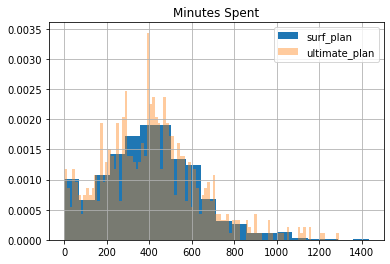

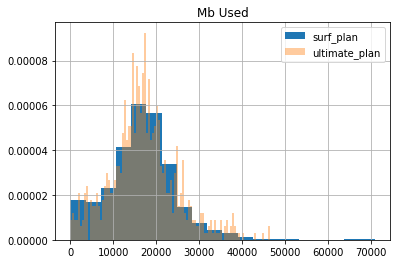

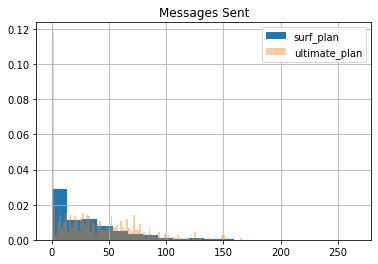

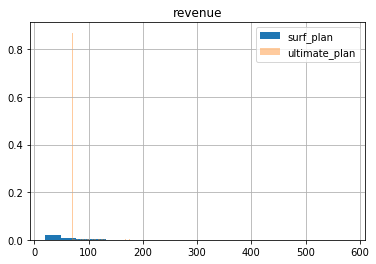

In [36]:
def plot_hists(df1,df2,column):
    ax = df1.hist(column=column,density=True, bins=20)
    df2.hist(column=column,density=True, bins=100, alpha=0.4,ax =ax)
    plt.legend(['surf_plan','ultimate_plan'])
    
plot_hists(df_usage_surf,df_usage_ultimate,'Minutes Spent' )
plot_hists(df_usage_surf,df_usage_ultimate,'Mb Used')
plot_hists(df_usage_surf,df_usage_ultimate,'Messages Sent')
plot_hists(df_usage_surf,df_usage_ultimate,'revenue')

In [37]:
month_hierarchy = ["January", "February", "March","April","May","June","July","August","September","October","November","December"]
df_usage['month'] = pd.Categorical(df_usage['month'], month_hierarchy)
#df_usage.dtypes
utilization_group = df_usage.groupby(['plan','month']).agg({'Minutes Spent':'sum','Mb Used':'sum','Messages Sent':'sum', 'revenue':'sum'})
utilization_group

Minutes Spent     Mb Used  Messages Sent       revenue
plan     month                                                            
surf     January           385.68     9749.72           21.0     40.000000
         February         2527.66   109609.59          108.0    297.090000
         March            7152.31   306945.12          351.0   1002.419453
         April           16619.00   599210.15          870.0   1939.150703
         May             29033.10  1073099.33         1849.0   3492.206797
         June            39499.26  1484248.33         2454.0   4454.952188
         July            51367.31  2030815.67         3271.0   7160.620937
         August          62721.48  2720843.68         4662.0   9826.451484
         September       75852.46  3218737.67         5968.0  10656.431641
         October         96149.09  4102786.41         8020.0  14611.924453
         November       113086.75  4624009.00         9165.0  15547.878125
         December       142297.14  5766125.26        12275.0  21105.553047
ultimate January           732.65    27672.37           62.0    280.000000
         February         2659.03   119901.66          151.0    490.000000
         March            3428.42   219858.22          243.0    880.721680
         April            6646.67   338554.75          463.0   1528.208008
         May             11126.28   482109.99          931.0   2044.957031
         June            16441.12   720882.29         1379.0   3359.425781
         July            23822.27   964339.92         1937.0   4239.176758
         August          28206.51  1264845.13         2732.0   5160.305664
         September       35542.71  1459408.78         3259.0   6175.879883
         October         45067.81  1866930.66         4181.0   7641.744141
         November        53400.65  2163278.04         4903.0   9093.375977
         December        65384.90  2766801.97         6796.0  11029.935547

### Plan Utilization Varies Month Over Month 

Our ultimate plan customers and our Surf plan customers seem to generate the most revenue in December. In the case of the Surf plan, customer data usage also appears to spike in December. Let's plot this data and see what else we can find. 

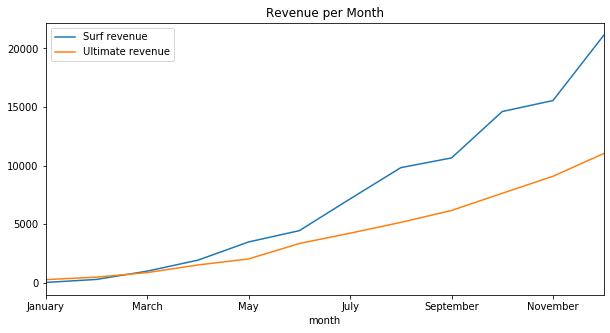

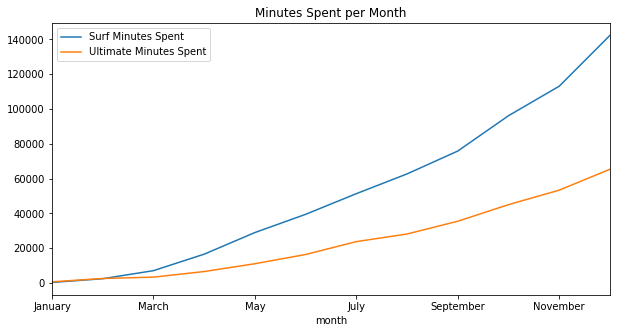

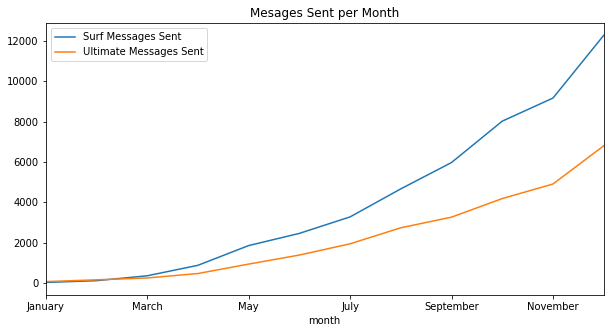

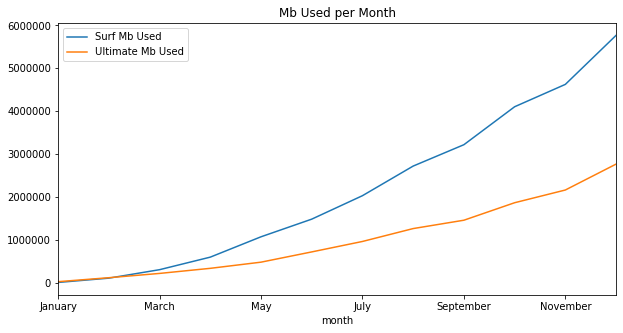

In [39]:
def plot_df(group_df,group, column, title):
    plt.figure(figsize=(10,5))
    group_df.xs(group[0])[column].plot()
    group_df.xs(group[1])[column].plot()
    plt.title(title)
    plt.legend(['Surf'+ " "+column, 'Ultimate' +" "+column])
    plt.show()
    
plot_df(utilization_group,['surf','ultimate'],'revenue','Revenue per Month')
plot_df(utilization_group,['surf','ultimate'],'Minutes Spent', 'Minutes Spent per Month')
plot_df(utilization_group,['surf','ultimate'],'Messages Sent','Mesages Sent per Month')
plot_df(utilization_group,['surf','ultimate'],'Mb Used', 'Mb Used per Month')

### Surf Plan Users Drive More Revenue, Use Network More 
Our plots reveal that surf plan users are driving more revenue than Ultimate plan users. Surf plan users also utilize the network more heavily than Ultimate plan users. 



<div class="alert alert-block alert-success">
<b>Success:</b> The EDA part was done well! Good job!
</div>

## Step 4: Testing Our Hypotheses 

Our analysis generated a few hypotheses, and since we're looking at a pretty healthy sample of data, let's see if we can determine if the average profit varies based on plan or location. 

In order to develop our hypotheses we will identify a falsifiable claim we can make about our data. We will then apply a method to determine the probability of finding a condition that falisifies our hypothesis. If we find such a condition, we will know that our hypothesis is incorrect, and can adjust our thinking. 

Our first hypothesis is that the average revenue per plan differs. we can use the ttest to determine if this is the case. If we find that revenue does differ, we will know that this statement is valid. 

In [43]:
ny_nj_users_bool = df_users['city'].apply(lambda x: True if 'NY-NJ' in x else False)
ny_nj_users = df_users[ny_nj_users_bool]['user_id'].values.tolist()

sample_ny_nj = df_usage[df_usage['user_id'].isin(ny_nj_users)]['revenue']
sample_other = df_usage[~df_usage['user_id'].isin(ny_nj_users)]['revenue']
alpha = 0.05
results = st.ttest_ind(sample_ny_nj, sample_other)

print('stat sig: ', alpha)
print('pvalue: ', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

stat sig:  0.05
pvalue:  0.026135219715942206
We reject the null hypothesis


### Average revenue _does_ differ Amongst Plans 

Based on our result, it would appear that the ultimate plan produces, on average, more revenue than the Surf plan. Let's move on and test our next hypothesis. 

### Average Profit From Users In NY-NJ Doesn't Meaningful Differ From Revenue In Other Segments 

In order to test this claim, we can compare the revenue generated by those in and outside of this key segment. If there is a difference in revenue, then we will know that this is the case. 


In [41]:
surf_sample = df_usage.groupby(['plan'])['revenue'].get_group('surf')
ultimate_sample = df_usage.groupby(['plan'])['revenue'].get_group('ultimate')

#surf_sample.mean() 
#ultimate_sample.mean()

alpha =.05
results=st.ttest_ind(surf_sample, ultimate_sample)
print('stat sig:', alpha)
print('pvalue:', results.pvalue)
if results.pvalue < alpha:
    print("We reject the null hypothesis")
else: 
    print("We cannot reject the null hypothesis")

stat sig: 0.05
pvalue: 3.1830477744750944e-13
We reject the null hypothesis



### Users From Other Regions Are Driving More Profit 
Based on our test, we determined that users from NY-NJ are less profitable than users from other regions. We should adjust our acquisition priorities accordingly! 


<div class="alert alert-block alert-info">
<b>Improve: </b> Please formulate null and alternative hypotheses more obviously. In t-test it's always like this: means in group1 and group2 are equal.
</div>

# Finding High Demand Surf Plan Customers Who Live Outside Of New York Grows Revenue

Our analysis revealed that our highest revenue generating users are high-utilizers on the Surf plan. We further identified that users from the NY-NJ metro area generate less revenue than users in other parts of the country. 

We should follow up on this report by learning more about these high-demand Surf plan users. Insights we gain about these customers will help us to unlock additional growth. 

# Appendix 
## Project Checklist 
- [x] Part One: Project Planning 
    - [x] review project documentation 
    - [x] download datasets 
    - [x] copy project planning documentation to texteditor 
    - [x] review team webinar 
    - [x] review team project notebook
    - [x] update project notebook to have checklist 
    - [x] update project notebook to include sections for each requirement 
    - [x] Open The Datafiles and Study General Information 
- [x] Part Two: Process the Data 
    - [x] Convert the data to the necessary types
    - [x] Find and eliminate errors in the data
    - [x] Explain what errors you found and how you removed them.
    - [x] For each user, find:
        - [x] The number of calls made and minutes used per month
        - [x] The number of text messages sent per month
        - [x] The volume of data per month
        - [x] The monthly profit from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)
        
- [x] Part Three: Analyze The Data  
    - [x] Describe the customers' behavior. 
    - [x] Find the minutes, texts, and volume of data the users of each plan require per month. 
    - [x] Calculate the mean, dispersion, and standard deviation. 
    - [x] Plot histograms. 
    - [x] Describe the distributions
    
- [x] Part Four: Test The Hypothesis  
    - [x] The average profit from users of Ultimate and Surf calling plans differs.
    - [x] The average profit from users in NY-NJ area is different from that of the users from other regions.
    - [x] Explain:
        - [x] How you formulated the null and alternative hypotheses.
        - [x] What criterion you used to test the hypotheses and why.
     
- [x] Part Five: Write An Overall Conclusion  
    - [x] Format Project In Jupyter Notebook 
    - [x] Put Code In Code Cells 
    - [x] Put Text Explanations In Markdown Cells  
    - [x] apply formatting 
    - [x] Write Conclusion  

## Data Columns And Explanations 
**NOTE:** Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.
### The users table (data on users):
* 		user_id — unique user identifier
* 		first_name — user's name
* 		last_name — user's last name
* 		age — user's age (years)
* 		reg_date — subscription date (dd, mm, yy)
* 		churn_date — the date the user stopped using the service (if the value is missing, the calling plan was being used when this database was extracted)
* 		city — user's city of residence
* 		plan — calling plan name
### The calls table (data on calls):
* 		id — unique call identifier
* 		call_date — call date
* 		duration — call duration (in minutes)
* 		user_id — the identifier of the user making the call
### The messages table (data on texts):
* 		id — unique text message identifier
* 		message_date — text message date
* 		user_id — the identifier of the user sending the text
### The internet table (data on web sessions):
* 		id — unique session identifier
* 		mb_used — the volume of data spent during the session (in megabytes)
* 		session_date — web session date
* 		user_id — user identifier
### The plans table (data on the plans):
* 		plan_name — calling plan name
* 		usd_monthly_fee — monthly charge in US dollars
* 		minutes_included — monthly minute allowance
* 		messages_included — monthly text allowance
* 		mb_per_month_included — data volume allowance (in megabytes)
* 		usd_per_minute — price per minute after exceeding the package limits (e.g., if the package includes 100 minutes, the 101st minute will be charged)
* 		usd_per_message — price per text after exceeding the package limits
* 		usd_per_gb — price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)